In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import PIL.ImageOps
import random
import decimal
import json

In [2]:
# Declaring variables
x_sequences = 12000000    # the number of sequences expected in the fragment band
upperLength = 6000  # the maximum length of the fragment in the selected band
lowerLength = 3500  # the minimum length of the fragment in the selected band

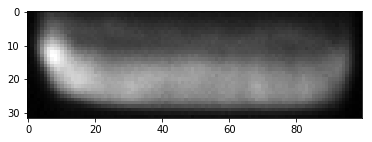

In [3]:
img = Image.open('enriched_long.tif')
#read image
#img_arr = plt.imread("enriched_long.tif")
#print(img_arr)
#print(img_arr.mean(axis=1))
#view image
#plt.imshow(img_arr, cmap="gray")
#plt.show()

imgCropped = img.crop((890,180, 990, 212))  # cropping 3.5kb to 6kb
plt.imshow(np.asarray(imgCropped), cmap="gray")
#plt.imshow(imgCropped)


In [4]:
# funciton to write json file
def writeJson(filename, data):
    with open(filename, "wt") as jsondata:
        json.dump(data, jsondata, sort_keys=True, indent=4, separators=(',', ': '))

Intensities:
334.71,373.01,421.95 ... 420.58,283.18,214.61
Proportions [0.012387875862906173, 0.013805388472476567, 0.01561669570778662, 0.01752164019902913, 0.019565375089381012, 0.021556924789667774, 0.023233512810908998, 0.024785374526817262, 0.026117762358267238, 0.027508257103477676, 0.028902082818266735, 0.031063882074794328, 0.03364316285184291, 0.03656294274137315, 0.03949271553963927, 0.04239732101220022, 0.04481079352577948, 0.046548449322628825, 0.04811289470138967, 0.04889456222917366, 0.04909256986523637, 0.04861365046137629, 0.04759807484762664, 0.04578713772004755, 0.04360313199966245, 0.040407991958299215, 0.03596595897133737, 0.029801444604495474, 0.022612842146091883, 0.015565990948645329, 0.010480710725277913, 0.007942882014096663]
Cum Proportions [0.01238788 0.02619326 0.04180996 0.0593316  0.07889698 0.1004539
 0.12368741 0.14847279 0.17459055 0.20209881 0.23100089 0.26206477
 0.29570793 0.33227088 0.37176359 0.41416091 0.45897171 0.50552016
 0.55363305 0.60252761 

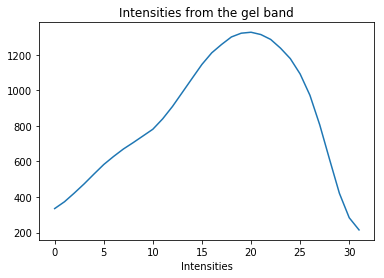

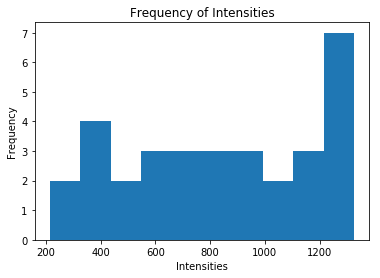

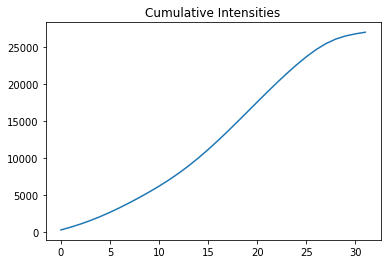

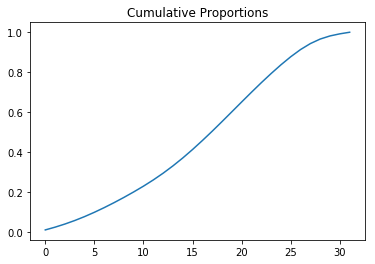

In [5]:
# here 
intensity_data = np.array(imgCropped, dtype="float64")   # data is a two-dimensional array

graph_intensities = []
intensities = []
cum_proportion = []
intensities=intensity_data.mean(axis=1) # get mean by column (axis=1), to get mean by row(axis=0). This is same as doing the for loop below commented
#print("Length of intensities: ", len(intensities))
json_intensities=dict()
for data in range(len(intensities)):
    #intensities.append(a.mean())
    json_intensities[str(data)]=intensities[data]

#print(json_intensities)

writeJson("intensities.json", json_intensities)

# get intensities, cumulative intensiteis and cumulative proportions
print("Intensities:")
print(",".join([str(x) for x in intensities[:3]]), "..." , ",".join([str(x) for x in intensities[-3:]]))
total_intensity=sum(intensities)
#print("Total intensity ", total_intensity)
cum_intensities=np.cumsum(intensities)
#print("Cum intensity ", cum_intensities)
proportions=[x/total_intensity for x in intensities]
print("Proportions", proportions)
cum_proportions=np.cumsum(proportions)
print("Cum Proportions", cum_proportions)

#print("\n\nCumulatative Intensities: ")
#print(",".join([str(x) for x in cum_proportions[:3]]),"...", ",".join([str(x) for x in cum_proportions[-3:]]))

#Plot intensities, cumulative intensiteis and cumulative proportions
plt.figure()
plt.title("Intensities from the gel band")
plt.plot(intensities)
plt.xlabel("Intensities")
plt.show()
plt.title("Frequency of Intensities")
plt.hist(intensities)
plt.xlabel("Intensities")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.title("Cumulative Intensities")
plt.plot(cum_intensities)
plt.show()

plt.figure()
plt.title("Cumulative Proportions")
plt.plot(cum_proportions)
plt.show()

max_proportion=max(cum_proportions)
min_proportion=min(cum_proportions)

In [6]:
def get_random_number(N, mean, std, minimum, maximum):
    x = []

    while len(x) < N:
        y = np.random.normal(loc=mean, scale=std, size=1)[0]
        if minimum <= y <= maximum:
            x.append(y)

    return x

In [7]:
# lets say x number of sequences are in the gel band, and so x number of sequences are produced by sequencing machine
number_of_rows = 32
unitLength = (upperLength - lowerLength)/number_of_rows
if not unitLength - int(unitLength) == 0:
    unitLength = int(unitLength) + 1
print(unitLength)

fragmentlengths=[]

#Fragment lengths in the gel image are:

for x in range(6000, 3500, -(int(unitLength))):
    #print(x)
    fragmentlengths.append(x)

#len(lengths)

79


In [8]:
total_to_generate=225498  # total number of sequences to generate randomly, this is mean from 5 datasets

In [13]:

total_proportion=[]
for x, y in zip(proportions, cum_proportions):
    #print(int(x * x_sequences))
    total_proportion.append({"total":int(x * x_sequences), "proportion": x, "cumProportion": y})

seqlength_total_fragments_proportion={}
for x in range(len(fragmentlengths)):
    seqlength_total_fragments_proportion[str(fragmentlengths[x])] = total_proportion[x]

               
print("Fragment_Length\tFragments")
for x in seqlength_total_fragments_proportion.keys():
    print(str(x) + "\t" + str(seqlength_total_fragments_proportion[x]["total"]))
# write the dat to json file
writeJson("seqlength_total_proportion.json", seqlength_total_fragments_proportion)

Fragment_Length	Fragments
6000	148654
5921	165664
5842	187400
5763	210259
5684	234784
5605	258683
5526	278802
5447	297424
5368	313413
5289	330099
5210	346824
5131	372766
5052	403717
4973	438755
4894	473912
4815	508767
4736	537729
4657	558581
4578	577354
4499	586734
4420	589110
4341	583363
4262	571176
4183	549445
4104	523237
4025	484895
3946	431591
3867	357617
3788	271354
3709	186791
3630	125768
3551	95314


In [14]:
#np.random.seed(100) #fix the seed such that the random value does not change
def random_chromosome_selection(number_of_chromosomes, totalSequences):
    return np.random.random_integers(1, number_of_chromosomes, totalSequences)

def randomFragmentLength(sequenceLength, total_to_generate):
    #return np.random.random_integers(sequenceLength-unitLength, sequenceLength, total_to_generate)
    return np.random.randint(sequenceLength-unitLength, sequenceLength, total_to_generate)
def select_start_position(chromosomeLength, subseqLength):
    try:
        assert(chromosome > subseqLength)
    except AssertionError as aerr:
        return None

    return np.random.random_integers(1, chromosomeLength-subseqLength)
def pickStrand():
    return np.random-randint(1,3)  

def generate_random_normal(x):
    '''generate a random number from a normal distribution'''
    randomn=np.random.normal(x, x/100)
    while(True):
        if randomn < 0: ## this is an intensity, intensity can never come -ve realistically
            randomn=np.random.normal(x,x/100)
        else:
            return randomn
    return
def get_random_number_for_fragment_length(total_to_generate):
      return(np.random.rand(total_to_generate))   # this will generate N random values between 0 and 1
def generate_a_replicate(proportions):
    '''
        function to replicate intensity proportion with small deviation or variation
    ''' 
    new_set_of_proportion=[generate_random_normal(x) for x in proportions]
    return new_set_of_proportion
    

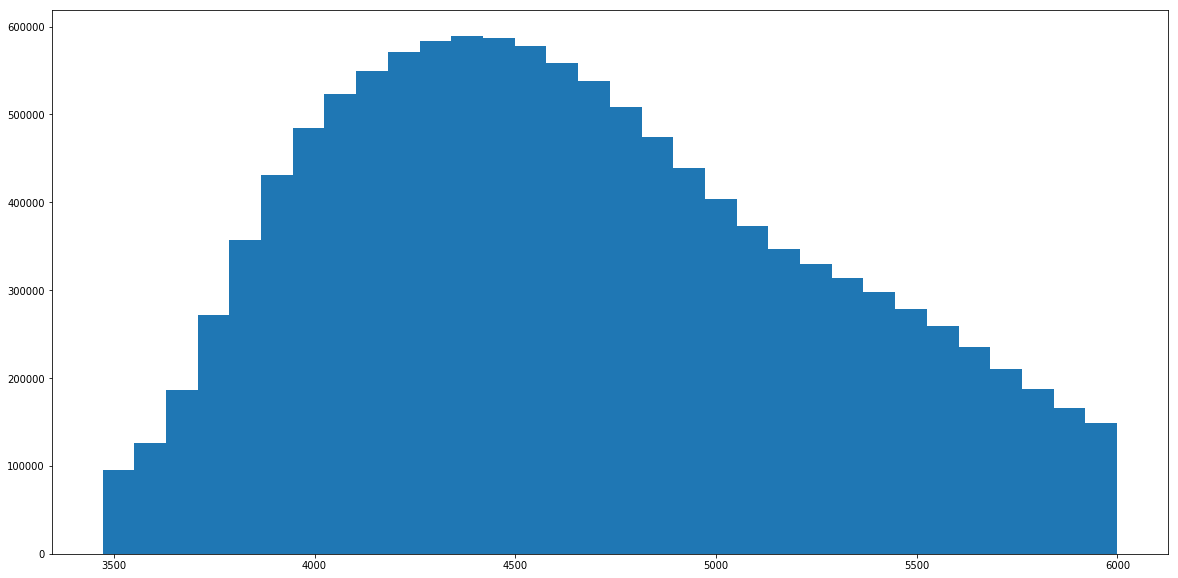

In [15]:
# Generating random fragment lengths, such that the lengths are distributed from start to end of each row of intensity e.g from 3551 to (3551+79)
data = []
for x in sorted(seqlength_total_fragments_proportion.keys(), reverse=True):
    #print(str(x) + "\t" + str(unitLength) + " " + str(seqlength_total_fragments_proportion[x]["total"]))
    data = np.append(data, randomFragmentLength(int(x), int(seqlength_total_fragments_proportion[x]["total"])))

fig=plt.figure(figsize=(20,10))
plt.hist(data, bins=number_of_rows)
plt.show()
#This was my model. Dan said there is no variablility. 

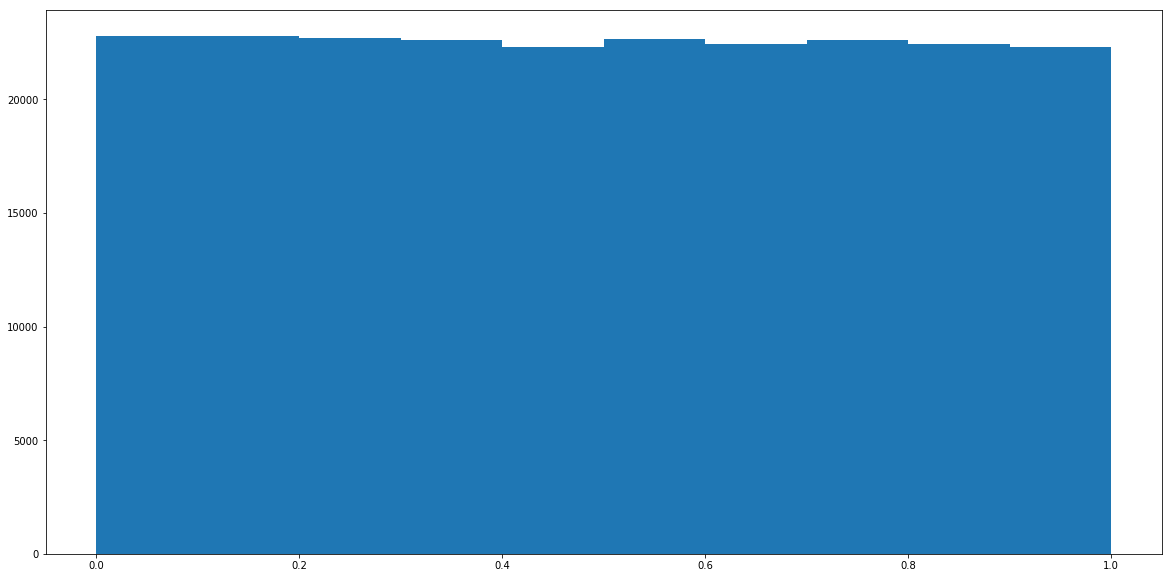

In [16]:
# let's use the model as Dan said
# Generate random values from 0 to 1

data=get_random_number_for_fragment_length(total_to_generate)
fig=plt.figure(figsize=(20,10))
plt.hist(data)
plt.show()

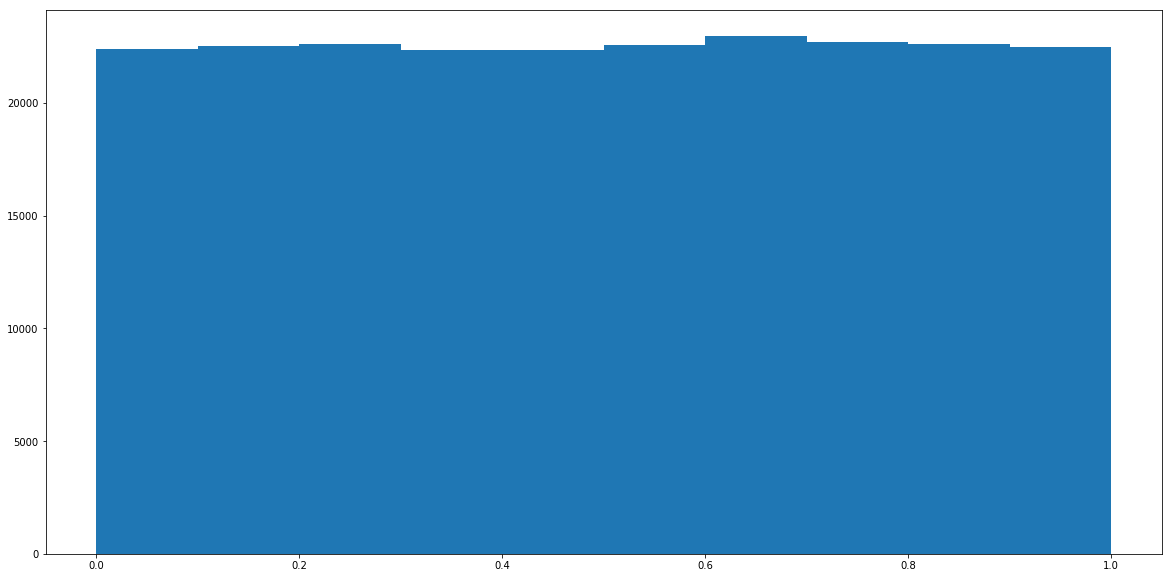

In [17]:
# this is same as code above but generating one random value at a time
data=[]
for n in range(total_to_generate):
    data.append(np.random.rand())
fig=plt.figure(figsize=(20,10))
plt.hist(data)
plt.show()

In [18]:
def get_fragment_length_from_cumproportion(value):
  
    for key in sorted(seqlength_total_fragments_proportion.keys(), reverse=True):
        if value <= seqlength_total_fragments_proportion[key]["cumProportion"]:
              return int(key)

fragment_lengths=[]
for x in data:  # data variable is random values 0 to 1, from code above
      fragment_lengths.append(get_fragment_length_from_cumproportion(x))

for x in sorted(seqlength_total_fragments_proportion.keys(), reverse=True):
    x=int(x)
    print("Counts of " + str(x) + " " + str(fragment_lengths.count(x)))

print(fragment_lengths[:100])

Counts of 6000 2760
Counts of 5921 3112
Counts of 5842 3475
Counts of 5763 4010
Counts of 5684 4298
Counts of 5605 4819
Counts of 5526 5306
Counts of 5447 5520
Counts of 5368 5921
Counts of 5289 6087
Counts of 5210 6492
Counts of 5131 7082
Counts of 5052 7671
Counts of 4973 8102
Counts of 4894 8764
Counts of 4815 9501
Counts of 4736 9991
Counts of 4657 10578
Counts of 4578 10844
Counts of 4499 11005
Counts of 4420 11312
Counts of 4341 11112
Counts of 4262 10753
Counts of 4183 10424
Counts of 4104 9917
Counts of 4025 9078
Counts of 3946 8151
Counts of 3867 6586
Counts of 3788 5105
Counts of 3709 3530
Counts of 3630 2406
Counts of 3551 1786
[4183, 5368, 4736, 5605, 4973, 3630, 4341, 5526, 3788, 4657, 5921, 5368, 5368, 4262, 5605, 3867, 3788, 4578, 4104, 5289, 5526, 5052, 4736, 5684, 4657, 6000, 5684, 4262, 4815, 5368, 4420, 4973, 4499, 4420, 4736, 4894, 3867, 4815, 5447, 4499, 4420, 5605, 4578, 5842, 4578, 4657, 5210, 4025, 5052, 4104, 4894, 4736, 3709, 5052, 4499, 3630, 5131, 5368, 4262

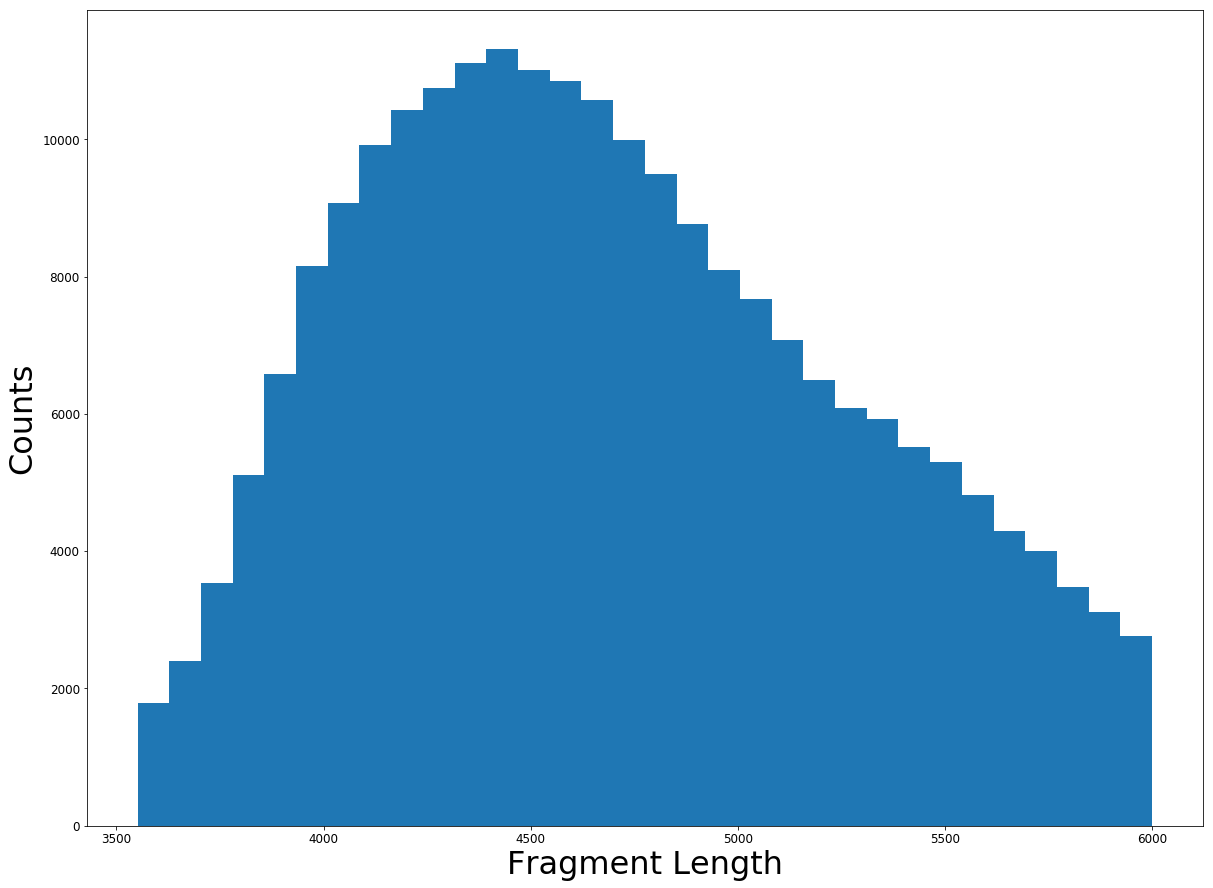

In [19]:
fig=plt.figure(figsize=(20,15))
plt.hist(fragment_lengths, bins=number_of_rows)
plt.tick_params(which="both", labelsize=12.00)
plt.xlabel("Fragment Length", fontsize=32)
plt.ylabel("Counts", fontsize=32)
plt.show()

In [54]:
bait_regions_mapped = {}

# lets get the chromosome lengths first
referencelenghts = open("data/PGSC_DM_v3_scaffolds.fasta.txt")
for line in referencelenghts:
    line=line.rstrip()
    if line == "": continue
    linearray=line.split()
    if int(linearray[1]) > 3500:
        bait_regions_mapped[linearray[0]] = {"reflength": int(linearray[1])}

for key in list(bait_regions_mapped.keys())[:10]:
    print(key, bait_regions_mapped[key])        

PGSC0003DMS000000001 {'reflength': 128518}
PGSC0003DMS000000002 {'reflength': 311834}
PGSC0003DMS000000003 {'reflength': 325292}
PGSC0003DMS000000004 {'reflength': 347721}
PGSC0003DMS000000005 {'reflength': 451764}
PGSC0003DMS000000006 {'reflength': 561457}
PGSC0003DMS000000007 {'reflength': 252555}
PGSC0003DMS000000008 {'reflength': 290511}
PGSC0003DMS000000009 {'reflength': 12818}
PGSC0003DMS000000010 {'reflength': 364360}


In [55]:
result = open("results/bait_mapped_to_solanum.txt")
for line in result:
    line == line.rstrip()
    if line == "": continue
    linearray=line.split()
    if linearray[1] in bait_regions_mapped.keys() and int(linearray[5]) == 0 and int(linearray[6]) == 1 and int(linearray[7]) == 120:  # these are number of gaps, start and end position of query
        bait_regions_mapped[linearray[1]].update({'pos' + linearray[8] : {'mapstart':int(linearray[8]), 'mapend': int(linearray[9])}})
result.close()
for key in list(bait_regions_mapped.keys())[:10]:
    print(key, bait_regions_mapped[key])

PGSC0003DMS000000001 {'reflength': 128518}
PGSC0003DMS000000002 {'reflength': 311834}
PGSC0003DMS000000003 {'reflength': 325292}
PGSC0003DMS000000004 {'reflength': 347721, 'pos344759': {'mapstart': 344759, 'mapend': 344640}, 'pos344699': {'mapstart': 344699, 'mapend': 344580}, 'pos344639': {'mapstart': 344639, 'mapend': 344520}, 'pos344399': {'mapstart': 344399, 'mapend': 344280}, 'pos343919': {'mapstart': 343919, 'mapend': 343800}, 'pos343679': {'mapstart': 343679, 'mapend': 343560}, 'pos343559': {'mapstart': 343559, 'mapend': 343440}, 'pos345606': {'mapstart': 345606, 'mapend': 345487}, 'pos345546': {'mapstart': 345546, 'mapend': 345427}, 'pos345486': {'mapstart': 345486, 'mapend': 345367}, 'pos345426': {'mapstart': 345426, 'mapend': 345307}, 'pos345366': {'mapstart': 345366, 'mapend': 345247}, 'pos345306': {'mapstart': 345306, 'mapend': 345187}, 'pos345246': {'mapstart': 345246, 'mapend': 345127}, 'pos345186': {'mapstart': 345186, 'mapend': 345067}, 'pos345126': {'mapstart': 345126,

In [50]:
sorted_chromosomes = sorted(bait_regions_mapped.keys())
total_number_of_chromosomes=len(sorted_chromosomes)
counter=0

for random_fragmentlength in fragment_lengths[:100]:
  found = False
  while not found:
    random_chromosome_number = np.random.randint(1, total_number_of_chromosomes)
    chromosome_name=sorted_chromosomes[random_chromosome_number - 1]  ## because in python indexing starts from 0
    chromosome_length = bait_regions_mapped[chromosome_name]['reflength']
    
    #lets get random start position within the start and end mapping position
    if 'mapstart' in bait_regions_mapped[chromosome_name].keys():
        if bait_regions_mapped[chromosome_name]['mapstart'] > bait_regions_mapped[chromosome_name]['mapend']:
            bait_regions_mapped[chromosome_name]['mapstart'], bait_regions_mapped[chromosome_name]['mapend'] = bait_regions_mapped[chromosome_name]['mapend'], bait_regions_mapped[chromosome_name]['mapstart']
        random_startpos_in_bait_hitregion = np.random.randint(bait_regions_mapped[chromosome_name]['mapstart'], bait_regions_mapped[chromosome_name]['mapend'])
        # we need random fragment length on both side of the random startpos, 
    
        random_fragment_start, random_fragment_end = random_startpos_in_bait_hitregion - random_fragmentlength , random_startpos_in_bait_hitregion + random_fragmentlength 
        if random_fragment_start < 1 and random_fragment_end < chromosome_length - random_fragmentlength: 
          found = False
        else:
          bait_regions_mapped[chromosome_name].update({'start':random_fragment_start, 'end':random_fragment_end})
          found = True
    else:
        found=False


for key in list(bait_regions_mapped.keys())[:10]:
  print(key, bait_regions_mapped[key])

PGSC0003DMS000000001 {'reflength': 128518}
PGSC0003DMS000000002 {'reflength': 311834}
PGSC0003DMS000000003 {'reflength': 325292}
PGSC0003DMS000000004 {'reflength': 347721, 'mapstart': 343535, 'mapend': 343654, 'start': 338589, 'end': 348535}
PGSC0003DMS000000005 {'reflength': 451764}
PGSC0003DMS000000006 {'reflength': 561457}
PGSC0003DMS000000007 {'reflength': 252555}
PGSC0003DMS000000008 {'reflength': 290511}
PGSC0003DMS000000009 {'reflength': 12818}
PGSC0003DMS000000010 {'reflength': 364360, 'mapstart': 261457, 'mapend': 261576, 'start': 256979, 'end': 265977}


In [20]:
replica_of_proportion = generate_a_replicate(proportions)
print(replica_of_proportion)
#this cell can be discarded, not for a good model

[0.012415482023605795, 0.01379371685704619, 0.015670272330277478, 0.017460623616516152, 0.01967506562473508, 0.02172704654214331, 0.02291982134434133, 0.02480042036583891, 0.026093535222674758, 0.027514701048326606, 0.029465780745152756, 0.031422392086250646, 0.03372914972652067, 0.03706367286693365, 0.03926302625273124, 0.043031621368858596, 0.04459820307722254, 0.04580783241790701, 0.0484095817251628, 0.048750230138340886, 0.04956109718960682, 0.048235250134045206, 0.04769100656049888, 0.04506485130974386, 0.04379507714236551, 0.04033745922479211, 0.036032591789320646, 0.030386434046066866, 0.02241767953710629, 0.015471175047650956, 0.01049954754504758, 0.007984129484422248]


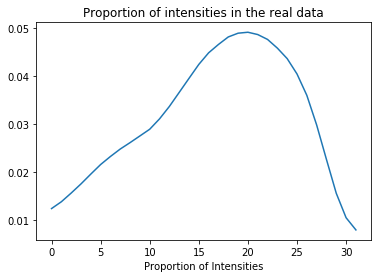

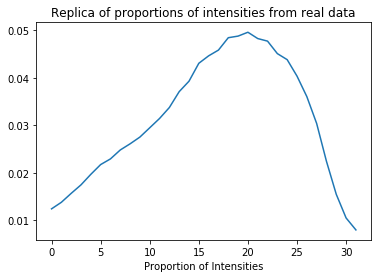

In [21]:
plt.figure()
plt.plot(proportions)
plt.title("Proportion of intensities in the real data")
plt.xlabel("Proportion of Intensities")
plt.show()

plt.plot(replica_of_proportion)
plt.title("Replica of proportions of intensities from real data")
plt.xlabel("Proportion of Intensities")
plt.show()

## this cell can be discarded, not for a good model

In [22]:
print(cum_proportions)

[0.01238788 0.02619326 0.04180996 0.0593316  0.07889698 0.1004539
 0.12368741 0.14847279 0.17459055 0.20209881 0.23100089 0.26206477
 0.29570793 0.33227088 0.37176359 0.41416091 0.45897171 0.50552016
 0.55363305 0.60252761 0.65162018 0.70023383 0.74783191 0.79361905
 0.83722218 0.87763017 0.91359613 0.94339757 0.96601042 0.98157641
 0.99205712 1.        ]


In [23]:

def get_cum_proportion(cum_proportions, random):

    for x in cum_proportions:
        if random < x:
            return x
    return




In [28]:
def get_length_from_dictionary(cum_proportions, random):
    assert (random >=0 and random <=1)
        
    cumprop = get_cum_proportion(cum_proportions, random)
    for key in seqlength_total_fragments_proportion.keys():
        if seqlength_total_fragments_proportion[key]["cumProportion"] == cumprop:
            return key


In [29]:
# lets generate random floating value between 0 and 1, and use that value as a probability 
# the cum proportion show which sequence lenght has higher or lower probability score
# more the intensity in the fragment band, means more sequences there and more the probability it has
# less the intensity in the fragment band, means less sequences there and less the probability it has

randomlengths=[]
for number in range(1000000):
    random = np.random.rand()
    
    length=get_length_from_dictionary(cum_proportions, random)
    randomlengths.append(length)
    
        
sortedrandomlengths=sorted(randomlengths)

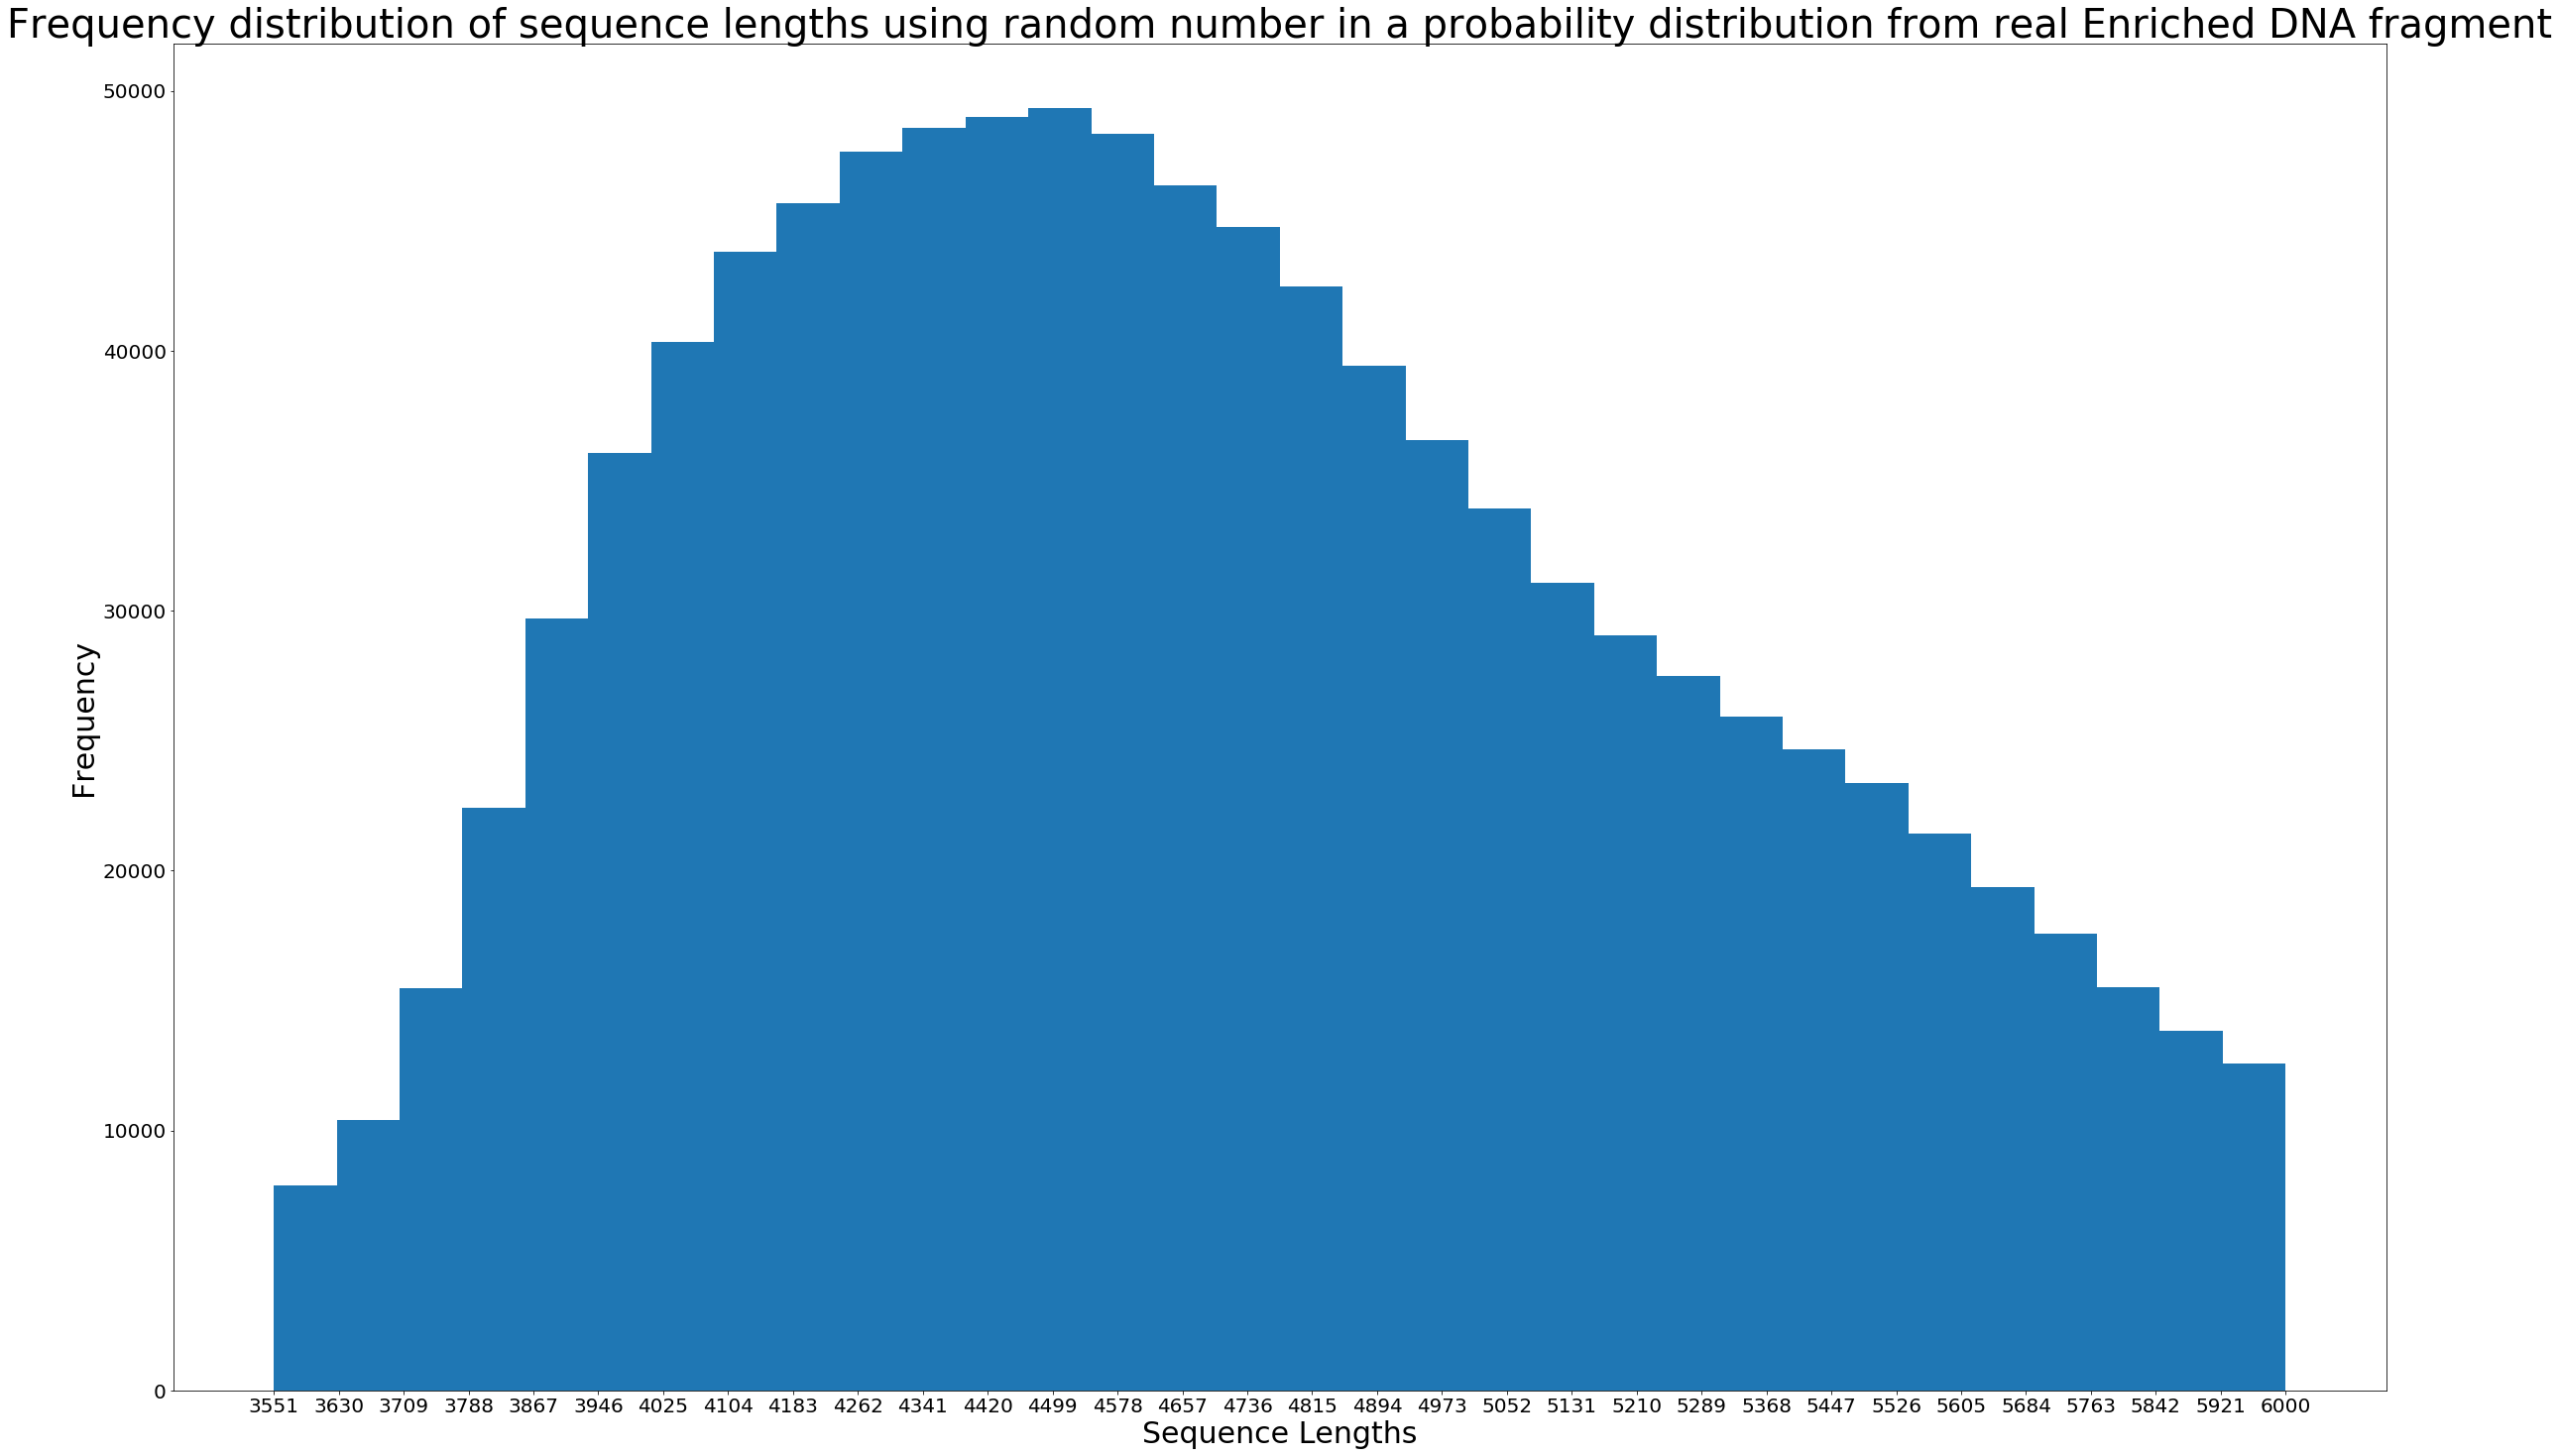

In [30]:

plt.figure(figsize=[40,25])
plt.hist(sortedrandomlengths, bins=32)
plt.title("Frequency distribution of sequence lengths using random number in a probability distribution from real Enriched DNA fragment", size= 40)
plt.xlabel("Sequence Lengths", size=30)
plt.ylabel("Frequency", size=30)
plt.tick_params(which='both', labelsize=20)
plt.show()